In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
import random
%matplotlib inline

In [108]:
file_name = '1.csv'
file = open(file_name , 'r')
lines = file.readlines()
data = [[] for x in lines]
for i in range(len(lines)):
    data[i] = [float(x) for x in lines[i].split(',')]
Y = [line[0] for line in data]
X = [line[1:] for line in data]

In [142]:
def MQ_evaluation(Z,X) :
    return (Z.T * Z).I * Z.T * X

In [154]:
Z = np.matrix(X)
XM = np.matrix(Y).T
theta = MQ_evaluation(Z,XM)
print('theta :')
print(theta)
print('det = ' + str(np.linalg.det(Z.T * Z)))

theta :
[[  3.98032747e+01]
 [ -2.03507648e+00]
 [  4.03605946e+00]
 [ -3.67135332e+03]]
det = 0.660907391435


In [155]:
def l_eval(Z,X,lmb):
    I = (Z.T * Z) * (Z.T * Z).I
    return np.array((Z.T * Z + lmb * I).I * Z.T * X)

In [184]:
lmb = np.arange(0,100 + 0.1,0.1)
theta = [[l_eval(np.append(Z[:i], Z[i+1:], axis=0),
                 np.append(XM[:i], XM[i+1:], axis=0),
                 lb) 
          for i in range(len(Y))]
          for lb in lmb]

In [185]:
disp = [np.var(theta[i],axis = 0) for i in range(len(lmb))]

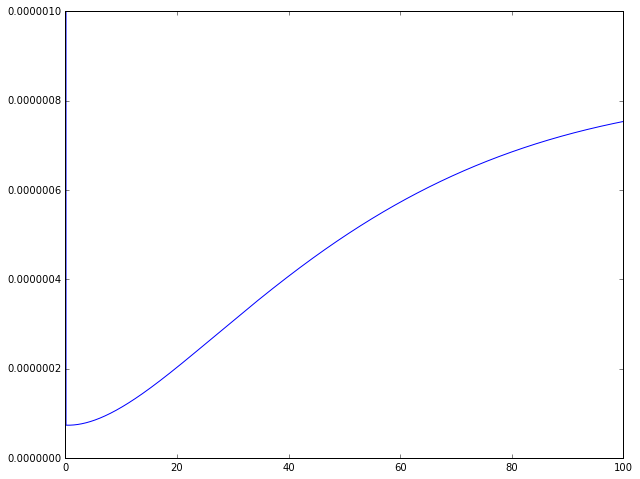

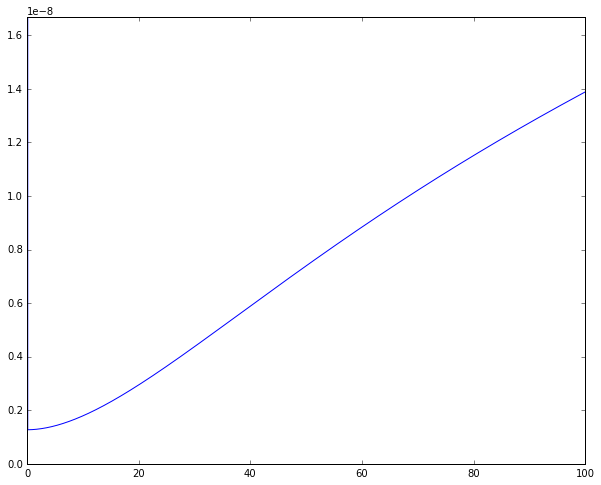

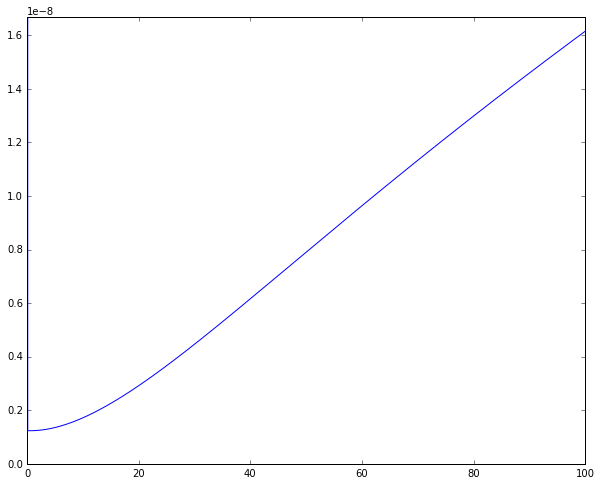

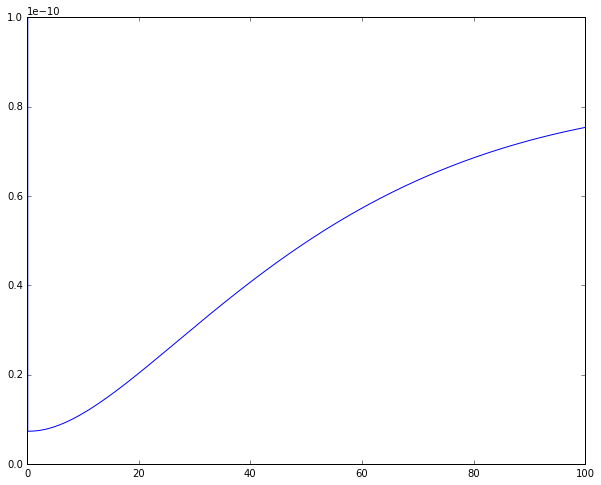

In [204]:
ylim = [[0,1e-6],[0,1e-7/6],[0,1e-7/6],[0,1e-10]]
dispT = [[disp[l][i][0] for l in range(len(lmb))] for i in range(4)]
for i in range(4):
    plt.figure(figsize=(10,8))
    plt.plot(lmb , dispT[i])
    plt.ylim(ylim[i])
    plt.show()


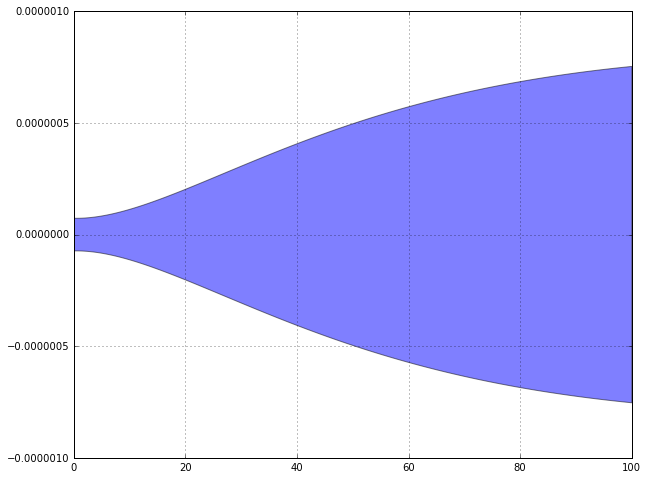

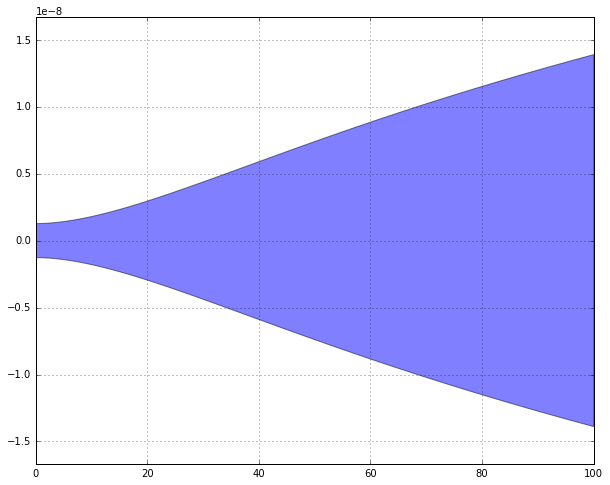

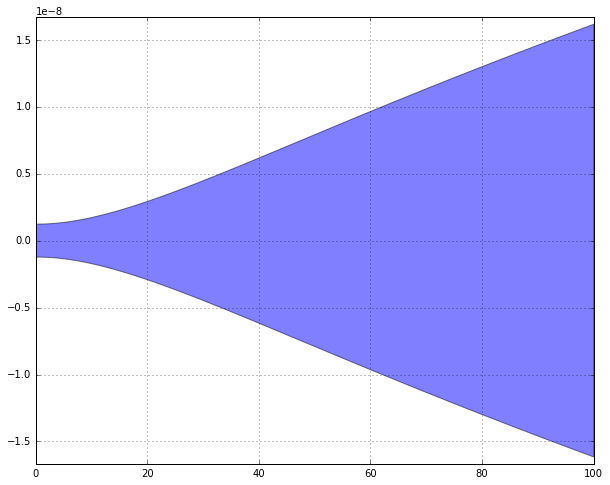

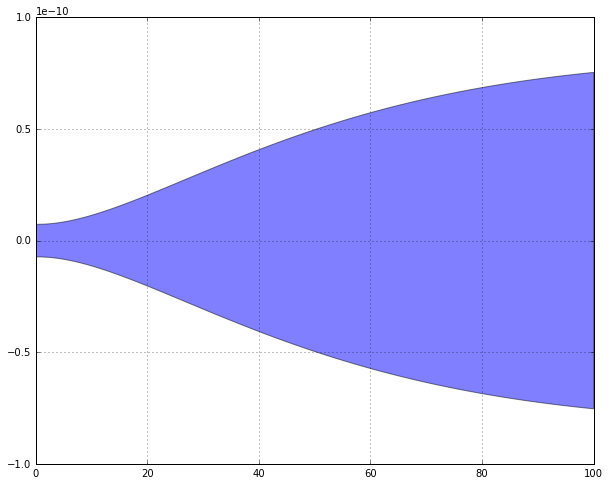

In [206]:
ylim = [[-1e-6,1e-6],[-1e-7/6,1e-7/6],[-1e-7/6,1e-7/6],[-1e-10,1e-10]]
for i in range(4):
    low = np.array([dispT[i][l] for l in range(len(lmb))])
    high = -1 * low
    plt.figure(figsize=(10,8))
    plt.fill_between(lmb, low, high, facecolor='blue' , alpha=0.5)
    plt.ylim(ylim[i])
    plt.grid(True)
    plt.show()

In [212]:
min_id = np.argmin(dispT[0])
lmbbest = lmb[min_id]
print('best lambda:')
print(lmbbest)
print('trust intervals:')
for i in range(4):
    print((-dispT[i][min_id] , dispT[i][min_id]))

best lambda:
0.4
trust intervals:
(-7.3001707516822477e-08, 7.3001707516822477e-08)
(-1.2718980117067473e-09, 1.2718980117067473e-09)
(-1.2347056355121986e-09, 1.2347056355121986e-09)
(-7.3042933297558516e-12, 7.3042933297558516e-12)
